In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import MESS
from MESS.util import set_params

## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Where do you want the simulation output to life?
analysis_dir = "/home/iovercast/Continuosity/MESS/analysis/"
analysis_dir = analysis_dir + "/full-parameter-estimation/"
if not os.path.exists(analysis_dir):
    os.mkdir(analysis_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
ipyclient = ipp.Client(cluster_id="MESS-Rich")
print(len(ipyclient))

40


In [32]:
r = MESS.Region("whole_enchilada")
## Region params
r.set_param("project_dir", analysis_dir)
r.set_param("generations", 0)
r.set_param("community_assembly_model", "*")
r.set_param("mutation_rate", 2.2e-8)
r.set_param("alpha", (1000, 10000))

## Metacommunity Params
r.set_param("S_m", 250)
r.set_param("J_m", 5e4)
r.set_param("speciation_rate", 2)
r.set_param("death_proportion", 0.7)
r.set_param("trait_rate_meta", 2)
r.set_param("ecological_strength", (0.001, 1))

## Local Params
r.set_param("J", (1000, 10000))
r.set_param("m", (0.001, 0.01))
r.set_param("speciation_prob", (0.0005, 0.005))

r.write_params(full=True, force=True)
#r.run(sims=1000, ipyclient=ipyclient)

8428


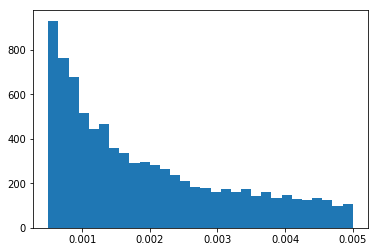

In [5]:

analysis_dir = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/"
simfile = analysis_dir + "fig5_sims/SIMOUT.txt"

sim_df = pd.read_csv(simfile, sep="\t", header=0)
_, _, _ = plt.hist(sim_df["speciation_prob"], bins=30)
print(len(sim_df))

## An example of how to perform CV prediction and plot the results

Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4    pi_h1    pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  abundance_dxy_cor  abundance_pi_cor  abundance_trait_cor  dxy_pi_cor  dxy_trait_cor  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10  8.723902  8.225848  7.962159   7.79611  8.72837  8.16692  7.879436  7.702071  0.062835  0.029769    -0.589386    -1.161144    0.07175  0.048512   0.037146  0.026643       0.103984      -1.555568      0.02929   0.05092      0  8.584184  8.143854  7.903654  7.752286            5.22974          3.083405               0.300961              -1.473625             3.851996           5.48239          

/home/iovercast/Continuosity/MESS/MESS/inference.py:374: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_model.fit(self.X, self.y)


Cross validation prediction
Cross validation scoring
Cross validation scores
[0.74688797 0.78423237 0.76986951 0.77256532 0.76781473]


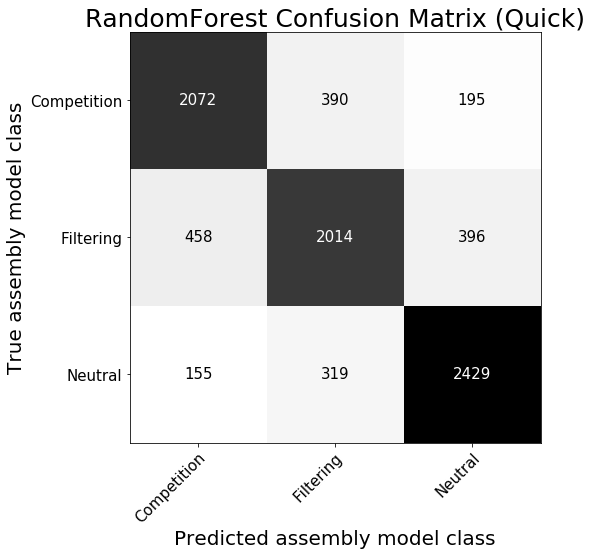

In [11]:
cla = MESS.inference.classification_cv(simfile=simfile, algorithm='rf',\
                                        quick=True, verbose=True)

_ = cla.plot_confusion_matrix(title="RandomForest Confusion Matrix (Quick)")

In [12]:
print(cla.classification_report)

              precision    recall  f1-score   support

 competition       0.77      0.78      0.78      2657
   filtering       0.74      0.70      0.72      2868
     neutral       0.80      0.84      0.82      2903

   micro avg       0.77      0.77      0.77      8428
   macro avg       0.77      0.77      0.77      8428
weighted avg       0.77      0.77      0.77      8428



## CV classification by hand
You can also perform the classification cv by hand, but this requires a few more
steps, including creating a dummy empirical dataset (synthetic community), and calling
predict and score by hand. This is useful for testing.

Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4    pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  abundance_dxy_cor  abundance_pi_cor  abundance_trait_cor  dxy_pi_cor  dxy_trait_cor  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10  8.451496  7.716448   7.28209  6.980752  9.43894  8.954831  8.565284  8.263289  0.059702  0.020397     0.323956    -1.506014   0.054719  0.034888   0.037655   0.02227       0.391506      -1.460377     0.026219  0.039406      0  8.554599  7.877817  7.499907  7.244813           4.722382          2.139051               -0.66329              -0.530232             5.214972          2.063185        

/home/iovercast/miniconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/iovercast/Continuosity/MESS/MESS/inference.py:374: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_model.fit(self.X, self.y)


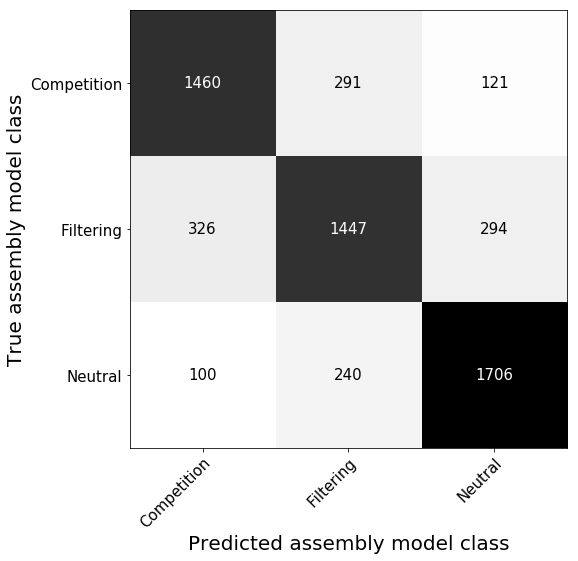

In [7]:
## Ensemble class needs to be fed a df for the empirical data
## which is ignored by the cv routines, so here we just give
## it some dummy data.
tmp_com = MESS.util.synthetic_community()
cla = MESS.inference.Classifier(tmp_com, simfile, algorithm="rf", verbose=True)
cla.cross_val_predict(quick=True, verbose=True)
cla.cross_val_score(quick=True, verbose=True)
_ = cla.plot_confusion_matrix()

## Running CV with varying target parameters
It's also possible to specify which data-types you'd like to use during the CV procedure, to investigate inference power based on the types of data you have from your empirical system. The base data axes are 'abundance', 'pi', 'dxy', and 'trait'. For example, if you only have abundance and genetic diversity from your local community you could run parameter estimation CV in the following way:

Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  trees  abundance_pi_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10  8.816649  8.212337   7.88819  7.695927  9.090017  8.577089  8.259638  8.042057  0.061594  0.025088    -0.471788     -1.00963   0.069337  0.032278      0         -0.187879      1      1      0      1      1      1      0      3      0      2
No features previously selected, using all.
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.56046706 0.5851419  0.59364548 0.56521739 0.57943144]


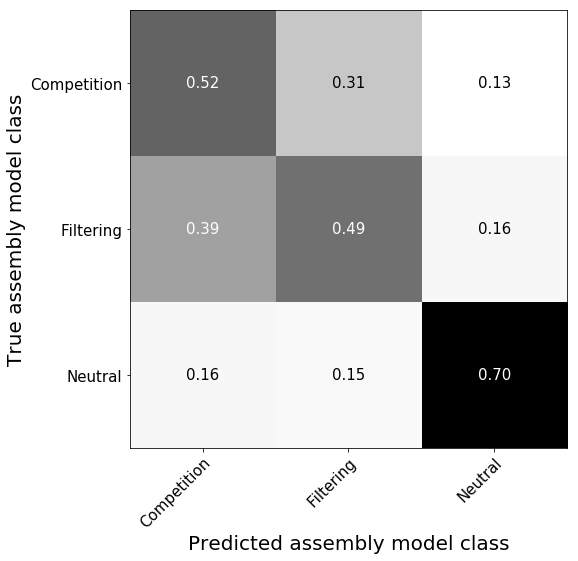

In [12]:
cla = MESS.inference.classification_cv(simfile=simfile, algorithm='rf',\
                                            data_axes=["abundance", "pi"],\
                                            quick=True, verbose=True)

_ = cla.plot_confusion_matrix(normalize=True)

## Run CV prediction for all supported ensemble methods
This will take a while.

Thu Jun  6 16:17:37 EDT 2019
ab
Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi   iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  abundance_dxy_cor  abundance_pi_cor  abundance_trait_cor  dxy_pi_cor  dxy_trait_cor  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10   7.83473  6.880261  6.400975  6.116484  8.314832  7.630695  7.247028  6.992041  0.051159  0.028507    -0.158552    -1.214185   0.050244  0.04533   0.042389  0.021671        0.90466       0.314571     0.036547  0.023333      0  8.541784  7.647691  7.162985  6.866603           6.087316          3.401665              -0.465794              -1.324129             6.

/home/iovercast/miniconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.7min finished


Best params for community_assembly_model: {'n_estimators': 230, 'learning_rate': 0.40800000000000003}
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.77711915 0.79134558 0.78173191 0.78622328 0.78562945]
              precision    recall  f1-score   support

 competition       0.78      0.78      0.78      2657
   filtering       0.76      0.69      0.73      2868
     neutral       0.80      0.87      0.84      2903

   micro avg       0.78      0.78      0.78      8428
   macro avg       0.78      0.78      0.78      8428
weighted avg       0.78      0.78      0.78      8428

Thu Jun  6 16:28:13 EDT 2019
gb
Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewn

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 104.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 368.6min finished


Best params for community_assembly_model: {'learning_rate': 0.012589254117941661, 'min_samples_leaf': 4, 'n_estimators': 1200, 'max_features': 'sqrt', 'min_samples_split': 5, 'max_depth': 10}
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.80142264 0.83461766 0.80901542 0.82066508 0.80463183]
              precision    recall  f1-score   support

 competition       0.84      0.80      0.82      2657
   filtering       0.80      0.75      0.77      2868
     neutral       0.81      0.90      0.85      2903

   micro avg       0.82      0.82      0.82      8428
   macro avg       0.82      0.82      0.81      8428
weighted avg       0.82      0.82      0.81      8428

Fri Jun  7 02:24:38 EDT 2019
rf
Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4    pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 30.5min finished


{'n_estimators': 400, 'min_samples_split': 2, 'bootstrap': False, 'max_depth': 70, 'min_samples_leaf': 2}
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.78956728 0.82335507 0.81257414 0.80997625 0.79334917]
              precision    recall  f1-score   support

 competition       0.83      0.78      0.81      2657
   filtering       0.78      0.74      0.76      2868
     neutral       0.80      0.89      0.85      2903

   micro avg       0.81      0.81      0.81      8428
   macro avg       0.81      0.81      0.80      8428
weighted avg       0.81      0.81      0.80      8428

Fri Jun  7 03:13:11 EDT 2019


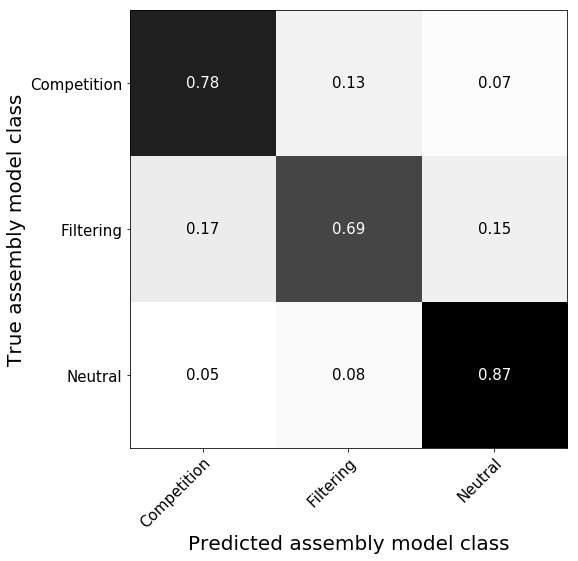

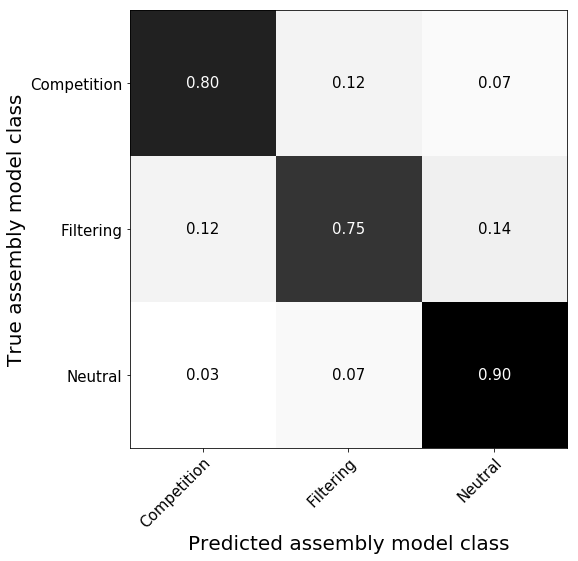

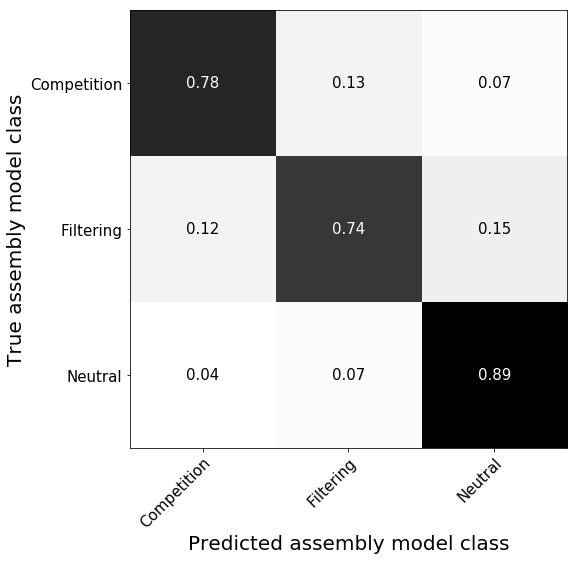

In [14]:
cv_dir = analysis_dir + "cv_classify_results/"
if not os.path.exists(cv_dir):
    os.mkdir(cv_dir)

quick=False
verbose=True

for algorithm in ["ab", "gb", "rf"]:
    !date
    print(algorithm)
    outfile = cv_dir + algorithm
    try:
        cla = MESS.inference.classification_cv(simfile=simfile, algorithm=algorithm,\
                                                quick=quick, verbose=verbose)

        cla.dump(outfile=outfile + ".mdl")
        _ = cla.plot_confusion_matrix(outfile=outfile + ".png",\
                                      normalize=True)
        print(cla.classification_report)
    except Exception as inst:
        print("Algorithm/model failed: {}/{}".format(algorithm, model))
        print(inst)
!date

## The last run (for comparison)

Wed Jun  5 00:15:58 EDT 2019
ab
Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  abundance_dxy_cor  abundance_pi_cor  abundance_trait_cor  dxy_pi_cor  dxy_trait_cor  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10  8.967417  8.437995  8.152732  7.982263  7.506433  6.746689  6.402261  6.207259  0.044507  0.030906    -0.020737    -1.642217   0.045585  0.057757   0.043529  0.029353        0.23793      -1.438609     0.037167  0.053518      0  8.975698  8.462904  8.184675  8.017581           4.171779          2.631231              -0.006639              -1.429977             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.9min finished


Best params for community_assembly_model: {'n_estimators': 230, 'learning_rate': 0.40800000000000003}
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.75062552 0.77378965 0.78010033 0.7583612  0.7951505 ]
Wed Jun  5 00:23:42 EDT 2019
gb
Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  abundance_dxy_cor  abundance_pi_cor  abundance_trait_cor  dxy_pi_cor  dxy_trait_cor  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10  7.765682  6.836604  6.310507  5.975642  8.301724  7.546052  7.091518  6.793518  0.050723  0.028925     0.069526    -1.234559  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 221.7min finished


Best params for community_assembly_model: {'learning_rate': 0.0630957344480193, 'min_samples_leaf': 2, 'n_estimators': 1400, 'max_features': 'sqrt', 'min_samples_split': 10, 'max_depth': 10}
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.80400334 0.81218698 0.82190635 0.79765886 0.82943144]
Wed Jun  5 04:53:00 EDT 2019
rf
Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3     pi_h4   mean_pi    std_pi  skewness_pi  kurtosis_pi  median_pi    iqr_pi  mean_dxys  std_dxys  skewness_dxys  kurtosis_dxys  median_dxys  iqr_dxys  trees  trait_h1  trait_h2  trait_h3  trait_h4  mean_local_traits  std_local_traits  skewness_local_traits  kurtosis_local_traits  median_local_traits  iqr_local_traits  abundance_dxy_cor  abundance_pi_cor  abundance_trait_cor  dxy_pi_cor  dxy_trait_cor  pi_trait_cor  SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  SGD_8  SGD_9
0  10  8.831347  8.361416  8.104437  7.93010

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 17.2min finished


{'n_estimators': 1200, 'min_samples_split': 2, 'bootstrap': False, 'max_depth': 50, 'min_samples_leaf': 1}
Cross validation prediction
Cross validation scoring
Cross validation scores
[0.79649708 0.8163606  0.81856187 0.79682274 0.82107023]


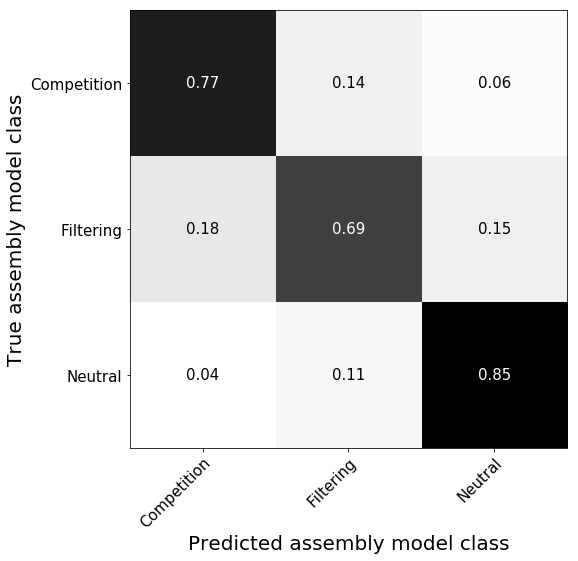

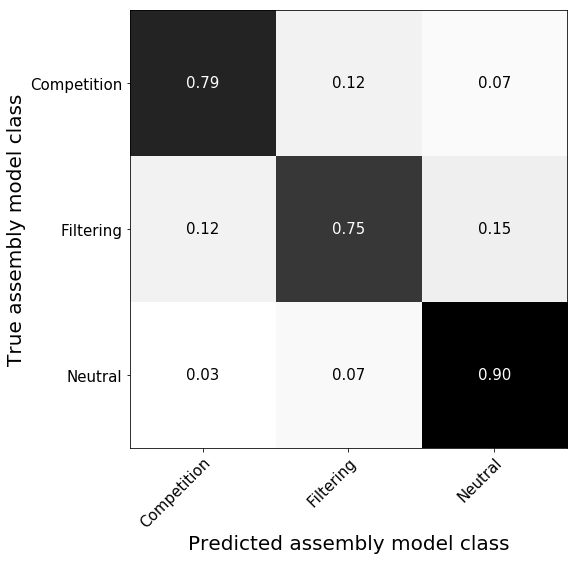

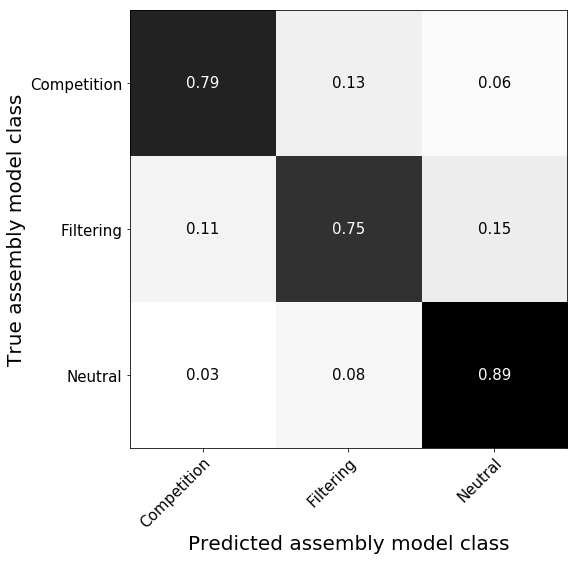

In [15]:
cv_dir = analysis_dir + "cv_classify_results/"
if not os.path.exists(cv_dir):
    os.mkdir(cv_dir)

quick=False
verbose=True

for algorithm in ["ab", "gb", "rf"]:
    !date
    print(algorithm)
    outfile = cv_dir + algorithm
    if not os.path.exists(outdir):
        os.mkdir(outdir)
    try:
        cla = MESS.inference.classification_cv(simfile=simfile, algorithm=algorithm,\
                                                quick=quick, verbose=verbose)

        cla.dump(outfile=outfile + ".mdl")
        _ = cla.plot_confusion_matrix(outfile=outfile + ".png",\
                                      normalize=True)

    except Exception as inst:
        print("Algorithm/model failed: {}/{}".format(algorithm, model))
        print(inst)